## II. Import Libraries and set required parameters

In [1062]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

pd.set_option('display.max_columns', 300) # to display all the columns

import time
from sklearn import metrics

## III. Data Sourcing

In [1063]:
data = pd.read_csv('telecom_churn_data.csv')

In [1064]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [1065]:
data.shape

(99999, 226)

## IV. Data Preprocessing

#### Revenue Based Churn

In [1066]:
#cust_revenue_less_then_4 = data[(data['arpu_6'] <4) & (data['arpu_7'] <4)]
#cust_revenue_less_then_4.shape

#data = data.drop(index = cust_revenue_less_then_4.index)
#data.shape

#### Usage Based Churn

In [1067]:
# Check if there were no incoming/outgoing/2G/3G usage
#usage_based_churn = data[['total_og_mou_6','total_ic_mou_6','vol_2g_mb_6','vol_3g_mb_6',\
#                          'total_og_mou_7','total_ic_mou_7','vol_2g_mb_7','vol_3g_mb_7']]
#data['usage_based_churn'] = usage_based_churn.sum(axis=1)

In [1068]:
#data = data.drop(index = data[data['usage_based_churn'] <=0].index)
#data.shape

#### High Value Customers

In [1069]:
data['total_rech_amt_6'] = data['total_rech_amt_6'].fillna(0)
data['total_rech_amt_7'] = data['total_rech_amt_7'].fillna(0)

data['rech_first_2months'] = (data['total_rech_amt_6'] + data['total_rech_amt_7']) / 2

In [1070]:
# Filter high-value customers (Recharged amount more than or equal to 70th percentile)
q70 = data["rech_first_2months"].quantile(0.7)
data = data[data["rech_first_2months"] >= q70]
q70

368.5

In [1071]:
data.shape

(30011, 227)

In [1072]:
cust_revenue_less_then_4 = data[(data['arpu_6'] <4) & (data['arpu_7'] <4)]
cust_revenue_less_then_4.shape

data = data.drop(index = cust_revenue_less_then_4.index)
data.shape

(30009, 227)

In [1073]:
# Check if there were no incoming/outgoing/2G/3G usage
usage_based_churn = data[['total_og_mou_6','total_ic_mou_6','vol_2g_mb_6','vol_3g_mb_6',\
                          'total_og_mou_7','total_ic_mou_7','vol_2g_mb_7','vol_3g_mb_7']]
data['usage_based_churn'] = usage_based_churn.sum(axis=1)

In [1074]:
data = data.drop(index = data[data['usage_based_churn'] <=0].index)
data.shape

(29872, 228)

### Null & Duplicate value checks

In [950]:
# check if there are any null values
print('No of Null Values: ',data.isnull().sum().sum())

# check if there are any duplicate rows, As mobile number is the unique key here, check the duplicates on mobile number.
print('No of duplicate rows: ',data['mobile_number'].duplicated().sum())

No of Null Values:  833956
No of duplicate rows:  0


In [951]:
#NA_col = data.isnull().sum()
#NA_col = pd.DataFrame(NA_col[NA_col.values >(0.30*len(data))])
#NA_col.columns = ['No_Null_Values']
#print('Total no of rows in Dataset: ',len(data))
#print('Count of NA(more than 30%) columns: ',len(NA_col))
#NA_col

In [952]:
#telecom = data.drop(NA_col.index,axis=1)
# telecom.shape

### Tag churned customers based on the details of their 4th month usage
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

In [953]:
last_month_usage = data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]
last_month_usage.isnull().sum() # there is no null value

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [954]:
last_month_usage.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0
17,87.13,631.08,0.0,0.0


In [955]:
last_month_usage['Total'] = last_month_usage.sum(axis=1)

C:\Anaconda3_5.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now tag churn = 1 if Sum of these columns is 0(that is customer has not used any of the services), 
otherwise 0.


In [956]:
last_month_usage['churn'] = last_month_usage['Total'].apply(lambda x: 0 if x > 0 else 1)

C:\Anaconda3_5.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [957]:
last_month_usage.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,Total,churn
7,0.00,0.00,0.0,0.0,0.00,1
8,34.91,142.18,0.0,0.0,177.09,0
13,631.86,446.09,0.0,0.0,1077.95,0
16,334.56,255.74,0.0,0.0,590.30,0
17,87.13,631.08,0.0,0.0,718.21,0


In [958]:
data['churn'] = last_month_usage['churn']

In [959]:
## Now remove all the columns in the dataset ending with '_9'

attributes_to_del = list(data.columns[data.columns.str.endswith('_9')])

In [960]:
data = data.drop(attributes_to_del,axis=1)

In [961]:
data.shape

(29979, 174)

In [962]:
data['churn'].describe()

count    29979.00000
mean         0.08636
std          0.28090
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: churn, dtype: float64

In [963]:
non_numeric_cols = data.select_dtypes(include=['object'])
non_numeric_cols.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [964]:
data = data.drop(non_numeric_cols,axis=1)

In [965]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rech_first_2months,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,NaN,2.0,3.0,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,NaN,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,19.83,NaN,0.0,0.0,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1.0,315

In [966]:
data.isnull().sum().sum()
# There are still null values in the data.

541908

In [967]:
telecom = data.fillna(0)

In [968]:
telecom.isnull().sum().sum()

0

In [969]:
telecom.shape

(29979, 165)

In [970]:
# Remove columns where number of unique value is only 1, that acts as a constant and will not add any value to the model.
unique = telecom.nunique()
unique = unique[unique.values == 1]
unique

circle_id           1
loc_og_t2o_mou      1
std_og_t2o_mou      1
loc_ic_t2o_mou      1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
dtype: int64

In [971]:
telecom = telecom.drop(labels = list(unique.index), axis =1)
telecom.shape

(29979, 155)

### Extract X, y from data

In [972]:
X,X_colnames,y,uid = telecom.drop(['churn','mobile_number'], axis=1),telecom.drop(['churn','mobile_number'], axis=1).columns, \
telecom['churn'],telecom['mobile_number']

### Scaling

In [973]:
# Scale features to [0,1], some models are sensitive to non-scaled data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [974]:
### Split training data to train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=27)

In [975]:
X_train.shape

(25482, 153)

### RFE : Feature Selection

In [976]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [977]:
#rank all features
from sklearn.feature_selection import RFE
rfe = RFE(model, n_features_to_select=12)
rfe.fit(X_train,y_train)

print ("Features sorted by their rank::::\n")
feature_ranking = sorted(list(zip(rfe.ranking_,X_colnames)))
print(feature_ranking[0:15])

Features sorted by their rank::::

[(1, 'last_day_rch_amt_8'), (1, 'loc_ic_mou_8'), (1, 'loc_ic_t2m_mou_8'), (1, 'loc_og_mou_8'), (1, 'loc_og_t2m_mou_8'), (1, 'max_rech_data_8'), (1, 'spl_ic_mou_8'), (1, 'std_og_mou_8'), (1, 'total_ic_mou_8'), (1, 'total_og_mou_6'), (1, 'total_og_mou_8'), (1, 'total_rech_num_8'), (2, 'roam_og_mou_7'), (3, 'total_rech_data_8'), (4, 'monthly_2g_8')]


[(1, 'aon'), (1, 'arpu_6'), (1, 'arpu_7'), (1, 'arpu_8'), (1, 'loc_ic_mou_8'), (1, 'loc_ic_t2m_mou_8'), (1, 'rech_first_2months'), (1, 'total_ic_mou_6'), (1, 'total_ic_mou_7'), (1, 'total_ic_mou_8'), (1, 'total_rech_amt_8'), (1, 'usage_based_churn'), (2, 'total_rech_amt_7'), (3, 'av_rech_amt_data_8'), (4, 'loc_ic_mou_6')]

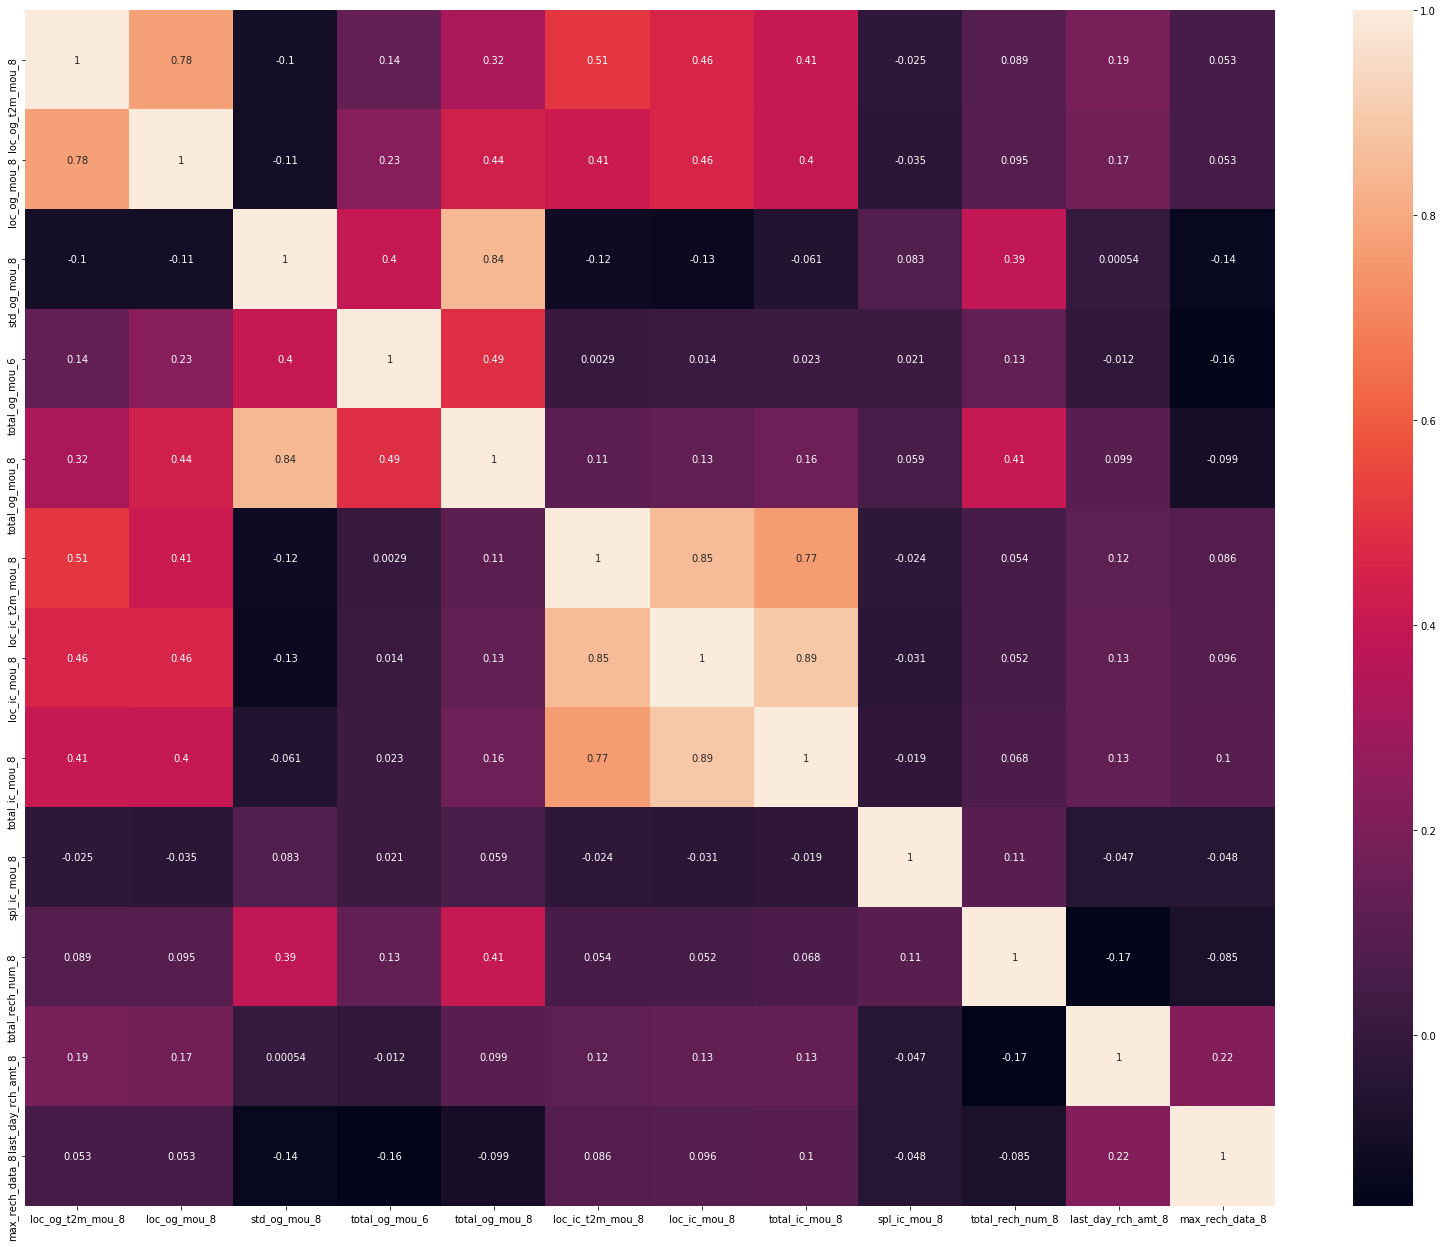

In [978]:
top_features = X_colnames[rfe.support_]
X_RFE = telecom[top_features]
corr = X_RFE.corr()
plt.figure(figsize = (28,22))
sns.heatmap(corr,annot = True)
plt.show()

### Dimensionality Reduction

There are 154 features, it will be difficult and time consuming task to reduce the features using p-value and VIF score.
So let's use PCA to do that.

In [979]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=27)

#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=27,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [980]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':X_colnames})
pcs_df.head()

,Feature,PC1,PC2
0,arpu_6,0.001546,-0.002521
1,arpu_7,0.001540,0.003066
2,arpu_8,0.002151,0.007407
3,onnet_mou_6,-0.014316,0.002921
4,onnet_mou_7,-0.012886,0.010515


### Screeplot - plotting the cumulative variance against the number of components

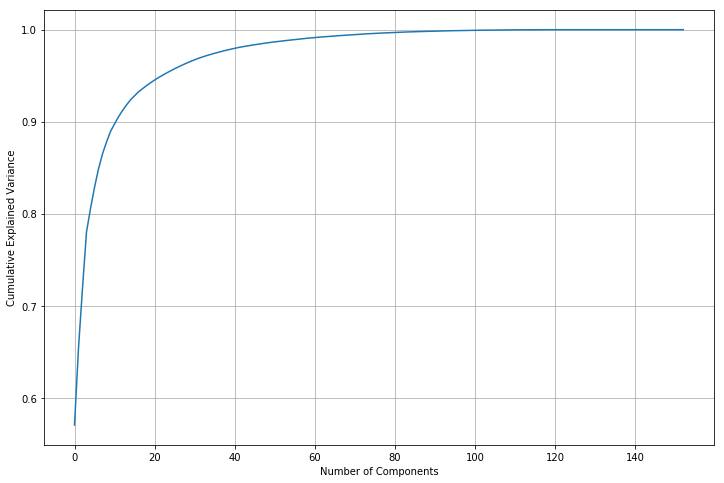

In [981]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

#### Looks like 15 components are enough to describe more than 90% of the variance in the dataset
- We'll choose 15 components for our modeling

Actual Dimensions 154, after PCA, 15

### Using incremental PCA for efficiency - saves a lot of time on larger datasets

In [982]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=12)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(25482, 12)

In [983]:
#Applying selected components to the test data - 15 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(4497, 12)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [984]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

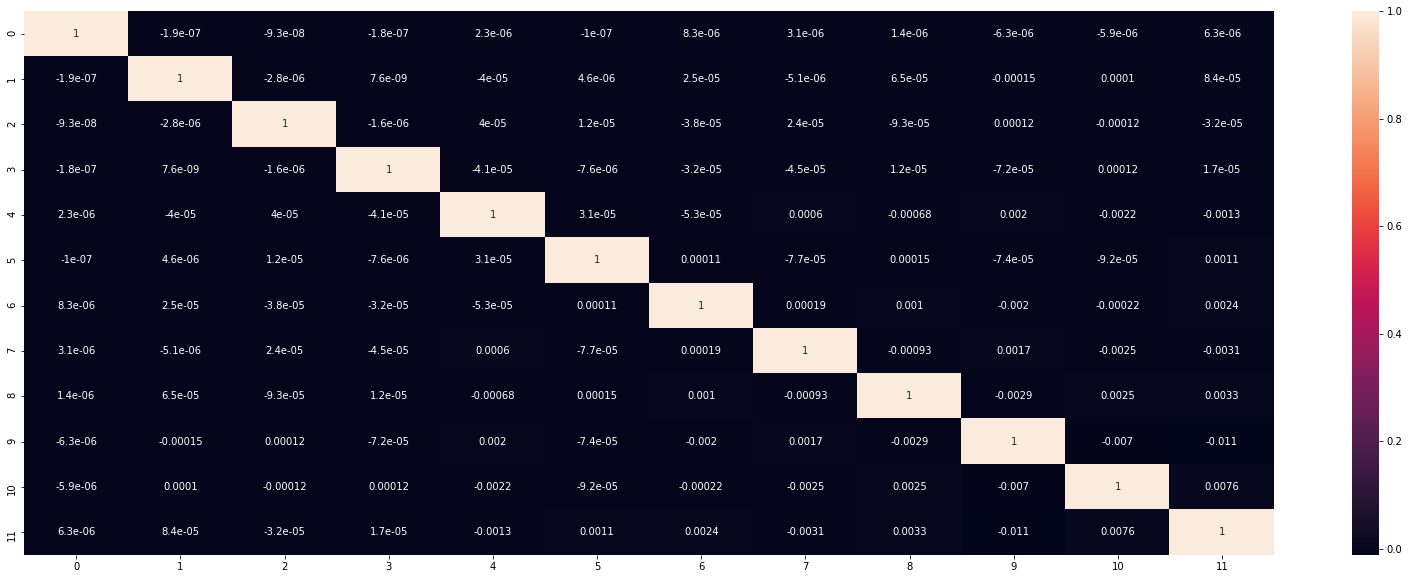

Execution Time:: 1.2367329597473145


In [985]:
#plotting the correlation matrix
start_time = time.time()
plt.figure(figsize = (28,10))
sns.heatmap(corrmat,annot = True)
plt.show()
print('Execution Time::',time.time() - start_time)

In [986]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.007571913364220341 , min corr:  -0.011435161850160493


#### Indeed - there is no correlation between any two components! 
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

### Decision tree(with PCA, no hyperparameter tuning)

In [987]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_pca, y_train)
y_pred = model_dt.predict(X_test_pca)
print('Execution Time::',time.time() - start_time)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Execution Time:: 1.1973285675048828
accuracy: 0.8761396486546587


#### Commented the below section of hyperparameter tuning after getting the result, as it may take time while running the notebook again.

### Decision tree(with PCA, with hyperparameter tuning)

In [988]:
start_time = time.time()

model_dt = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
print('Execution Time::',time.time() - start_time)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Execution Time:: 2.8801398277282715
accuracy: 0.9379586390927285


### SVM (Non Linear Model, with PCA, no hyperparameter tuning)

In [989]:
from sklearn.svm import SVC
start_time = time.time()
non_linear_model = SVC(kernel='rbf')
# fit
non_linear_model.fit(X_train_pca, y_train)

# predict
y_pred = non_linear_model.predict(X_test_pca)
print('Execution Time::',time.time() - start_time)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Execution Time:: 10.124655485153198
accuracy: 0.914609739826551


#### Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

#### Commented the below section of hyperparameter tuning after getting the result, as it may take time while running the notebook again. 
#### Results are: [Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 162.4min finished
#### The best test score is 0.9162697029549591 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}

### SVM (Non Linear Model, with PCA, with hyperparameter tuning)

In [990]:
start_time = time.time()
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print('Execution Time::',time.time() - start_time)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Execution Time:: 151.82422757148743
accuracy: 0.914609739826551


### Logistic

In [991]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict_proba(X_test_pca)
print('Execution Time::',time.time() - start_time)
# accuracy
#print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Execution Time:: 0.17132997512817383


In [992]:
#metrics.confusion_matrix(y_pred)

### Random Forest

In [993]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
model = RandomForestClassifier()
model.fit(X_train_pca,y_train)
y_pred = model.predict(X_test_pca)
print('Execution Time::',time.time() - start_time)
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Execution Time:: 1.682173728942871
accuracy: 0.9201690015565933


#### Grid Search to find optimal Hyperparameters for Random Forest

In [805]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(100, 400, 100),
    'n_estimators': [100,300, 100], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 17.8min finished


We can get accuracy of 0.918862215049425 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 300}


In [ ]:
start_time = time.time()
model = RandomForestClassifier()
model.fit(X_train_pca,y_train)
y_pred = model.predict(X_test_pca)
print('Execution Time::',time.time() - start_time)
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))